根據使用者的篩選條件:  
貓星人(寵物)
pet

---

11公路: 標準 : 步行15分鐘內  
201 1000  
202 1000  
203 1000  
204 1000  

---

吃貨  
101 300  
102 2100  

---

4運動達人  
402 1300  
403 1400  

---

5購物文青  
301 2400  
302 1200  
303 4800  
304 4100  
305 2200  

---

6安居  
501  4000  
502  5800  
504  6000  
505  6000  

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

import json
import numpy as np
import pandas as pd

from sklearn.neighbors import KernelDensity
from sklearn.neighbors import KDTree
#latlng => TWD97
from LatLonToTWD97 import LatLonToTWD97
c = LatLonToTWD97()

with open('./data/typeid.json') as f:
    typeid = json.load(f)
with open('./data/bw_result.json') as f:
    typebw = json.load(f)
rentdf = pd.read_csv('./data/clear_rent_items.csv')
envdf = pd.read_csv('./data/clear_env_items.csv')

In [4]:
%%time
#用KDE計算各類別分數
rentdata = list(map(c.convert,rentdf.loc[:,['lat','lng']].values))
col = '{}:{}'
kdtree = {}
kdedf = pd.DataFrame()
for key, value in typeid.items():
    name = col.format(key,typeid[key])
    bw = int(typebw[key])
    data = list(map(c.convert,envdf[envdf.typeID==int(key)].loc[:,['lat','lng']].values))
    kdtree[key] = KDTree(data)
    kde = KernelDensity(bandwidth=bw)
    kde.fit(data)
    kdedf[name] = kde.score_samples(rentdata)

CPU times: user 1min 3s, sys: 33.1 ms, total: 1min 3s
Wall time: 1min 3s


In [5]:
expkdedf = kdedf.apply(np.exp)

In [1028]:
expkdedf*1e+10

,101:Food,102:Supermarket,201:Bus,202:MRT,203:UBike,204:Train,205:Exam,206:Charger,207:Towing,301:BookStore,...,304:Museum,305:Theater,401:Park,402:Scenic,403:Sport,501:School,502:Hospital,503:Pharmacy,504:Police,505:FireStation
0,10.338114,6.525216,6.222444,2.743641,2.578102,0.351832,9.603686,3.559553,3.618224,7.157424,...,5.374936,5.461537e-06,24.371084,33.080315,14.355378,3.428863,4.055227,0.714845,3.010938,3.285898
1,0.001674,3.116042,2.095988,1.213362,1.619806,0.129080,2.184508,2.321821,3.237802,2.898086,...,3.618262,7.235309e-09,10.588290,6.075340,3.659256,2.247944,2.695675,0.215212,2.020878,2.135427
2,19.096426,5.635096,3.647129,3.607798,2.828551,0.487821,8.397414,4.093453,3.431280,6.782253,...,5.894984,1.019687e-04,14.188130,19.217698,10.990281,3.817722,4.757647,1.251263,3.508372,3.798055
3,110.340293,6.550678,6.456553,3.652277,3.040131,0.561568,10.342487,4.268246,3.983722,7.928312,...,6.113896,5.367299e-05,22.886437,42.948400,14.847305,3.936990,4.645851,1.124648,3.554794,3.984098
4,3.134035,0.350459,0.000559,0.213276,1.889589,7.098038,1.872127,2.216585,4.332213,1.833728,...,2.092603,1.848032e-05,2.239345,0.441577,5.796464,1.936472,2.360633,0.088164,2.091815,2.221412
5,114.328463,6.491945,6.527449,3.855490,3.113549,0.583720,10.329507,4.372370,3.905376,7.940451,...,6.238033,8.784666e-05,20.686762,37.755292,14.231859,4.032842,4.809054,1.268905,3.653435,4.073347
6,15.597100,6.200677,4.963724,2.908321,2.587730,0.365140,9.318687,3.642317,3.470563,6.938661,...,5.411409,1.252044e-05,20.104413,25.513024,13.229279,3.494768,4.233301,0.821355,3.109939,3.356979
7,31.578364,14.249890,36.306438,14.376695,11.071179,5.231488,10.079993,10.986195,4.036576,14.782290,...,17.130870,9.275966e+00,0.021096,2.504979,4.099936,10.795681,11.196651,19.537094,9.103118,10.009479
8,53.223871,17.758191,52.260036,19.861195,16.186777,6.919442,13.461181,13.493986,5.655364,18.516693,...,20.782251,1.426743e+01,0.167357,4.349059,5.044851,14.083320,13.682821,26.842793,10.730694,11.875652
9,33.851991,26.737786,57.745992,30.281274,27.467271,9.336568,25.972185,18.102751,10.766547,24.645659,...,26.799436,3.396671e+01,8.683184,9.245710,7.344313,20.552463,18.429408,39.605200,13.555760,15.086893


In [7]:
%%time
#使用bandwidth當作半徑計算個數
col = '{}:{}'
countdf = pd.DataFrame()
for key, value in typeid.items():
    name = col.format(key,typeid[key])
    bw = int(typebw[key])
    countdf[name] = kdtree[key].query_radius(rentdata,r=bw, count_only=True)

CPU times: user 1.1 s, sys: 1.98 ms, total: 1.1 s
Wall time: 1.11 s


In [346]:
kdtree['502'].query_radius([(294397.3348892754, 2785990.99944911)],r=10000)

array([array([55, 56, 61, 35, 36, 58, 59, 60, 54, 39, 11, 33])], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
#pet
le = LabelEncoder()
le.fit(rentdf.pet)

LabelEncoder()

In [9]:
le.classes_

array(['N', 'Y'], dtype=object)

In [10]:
tagdf = pd.DataFrame()

In [11]:
tagdf['tag:pet'] = le.transform(rentdf.pet)

In [12]:
#convienence transport
trans = {'201':800,'202':800,'203':800}
col = '{}:{}'
trans_df = pd.DataFrame()
for key, value in trans.items():
    name = col.format(key,typeid[key])
    bw = value
    trans_df[name] = kdtree[key].query_radius(rentdata,r=bw, count_only=True)

In [13]:
rentdf['transport'] = (trans_df>0).T.sum()

In [14]:
rentdf.groupby('transport').count().ID

transport
0      193
1      887
2     6343
3    13325
Name: ID, dtype: int64

In [84]:
trans = expkdedf.iloc[:,2:5].T.sum().T

In [1025]:
trans.describe()

count    2.074800e+04
mean     8.438625e-09
std      4.736872e-09
min      2.123348e-19
25%      4.914716e-09
50%      8.548278e-09
75%      1.278381e-08
max      1.639613e-08
dtype: float64

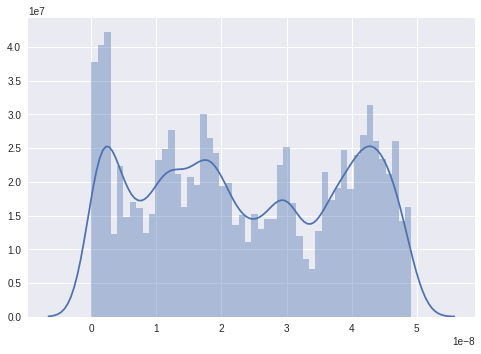

In [89]:
sns.distplot(trans*rentdf.transport, bins=50)

In [126]:
transport = pd.Series(trans*rentdf.transport)

In [127]:
#交通便利
tagdf['tag:transport'] = transport

In [134]:
#小資
tagdf['tag:capital'] = rentdf.rent<rentdf.rent.quantile(0.25)

In [129]:
#家庭
tagdf['tag:home'] = rentdf.label == '住'

In [94]:
#4運動達人
tmpdf = expkdedf.loc[:,['402:Scenic','403:Sport']]

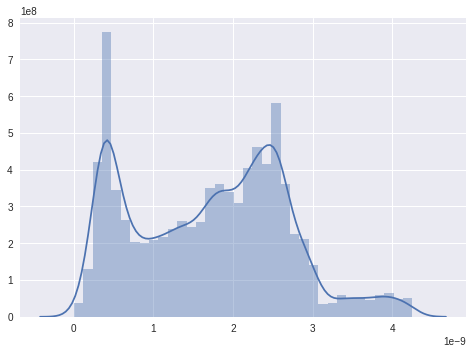

In [95]:
sns.distplot(tmpdf.T.mean().T)

In [877]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

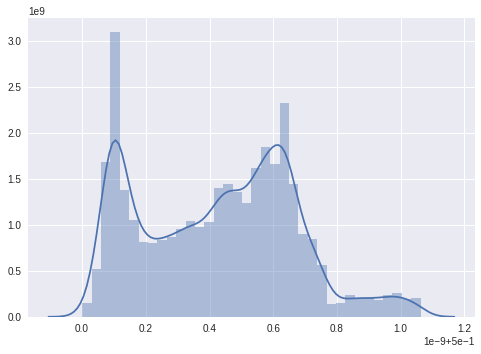

In [878]:
sns.distplot(sigmoid(tmpdf.T.mean().T))

In [713]:
sportdf = tmpdf

In [862]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
sc = StandardScaler()
km = KMeans(n_clusters=2, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)


In [906]:
X = sc.fit_transform(tmpdf)

In [907]:
y = km.fit_predict(X)

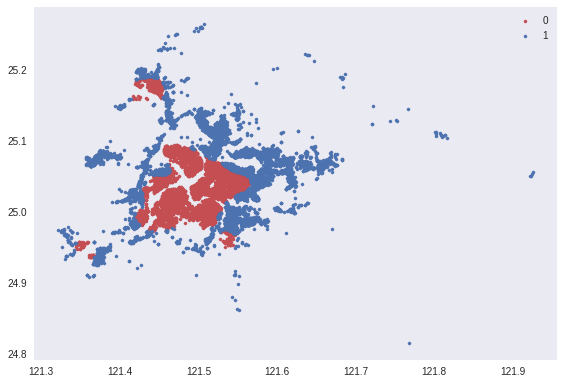

In [908]:
colors = ['r', 'b', 'g', 'c', 'm', 'y']

for l, c in zip(range(2), colors):
    plt.scatter(rentdf[y == l].lng , 
                rentdf[y == l].lat, 
                c=c, label=l, s=10)


plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [96]:
sport = tmpdf.T.mean().T

In [667]:
sport.describe()

count    2.074800e+04
mean     1.711459e-09
std      9.700659e-10
min      4.211763e-27
25%      7.836896e-10
50%      1.805521e-09
75%      2.450175e-09
max      4.250438e-09
dtype: float64

In [130]:
tagdf['tag:sport'] = sport

(count    2.074800e+04
 mean     3.383976e-09
 std      2.610360e-09
 min      8.481889e-14
 25%      1.208352e-09
 50%      2.551371e-09
 75%      5.596105e-09
 max      8.895233e-09
 dtype: float64, <matplotlib.axes._subplots.AxesSubplot at 0x7f69c943cc50>)

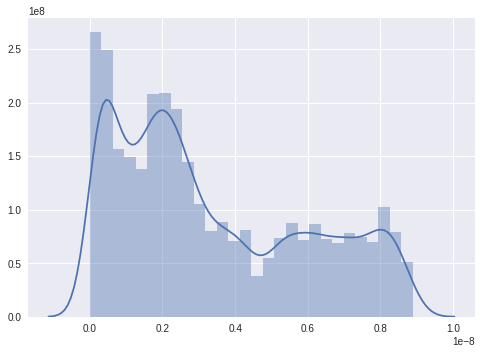

In [666]:
#文青 '301:BookStore','302:DepartmentStore', '303:Library', '304:Museum', '305:Theater'
culture = expkdedf.iloc[:,9:14].T.mean().T
culture.describe(),sns.distplot(culture)

In [131]:
tagdf['tag:culture'] = culture

(count    2.074800e+04
 mean     3.079522e-09
 std      1.756489e-09
 min      8.097153e-12
 25%      1.715940e-09
 50%      2.756701e-09
 75%      4.818277e-09
 max      5.865741e-09
 dtype: float64, <matplotlib.axes._subplots.AxesSubplot at 0x7f69cb4c89b0>)

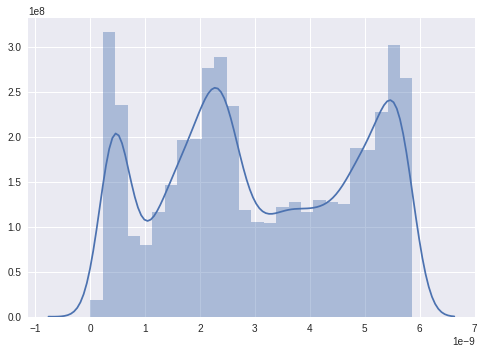

In [101]:
#safe 6安居 5xx
safe = expkdedf.iloc[:,17:23].T.max().T
safe.describe(), sns.distplot(safe)

In [132]:
tagdf['tag:safe'] = safe

(count    2.074800e+04
 mean     2.428423e-09
 std      1.493804e-09
 min      5.040060e-67
 25%      1.012774e-09
 50%      2.506566e-09
 75%      3.800593e-09
 max      4.896601e-09
 dtype: float64, <matplotlib.axes._subplots.AxesSubplot at 0x7f69cabf2208>)

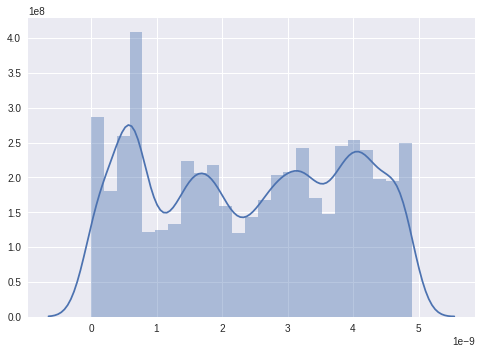

In [267]:
food = expkdedf.iloc[:,0:2].T.min().T
food.describe(), sns.distplot(food)

In [268]:
tagdf['tag:food'] = food

In [278]:
#compute avg cost of food
foodf = envdf[envdf.typeID==101]

def foodavg(array):
    if len(array)>0:
        return np.nanmean(foodf.loc[array,'cost'].dropna())
    else:
        return 0

favg = list(map(foodavg,kdtree['101'].query_radius(rentdata,r=typebw['101'])))

In [285]:
foodcost = pd.Series(favg)

In [284]:
foodcost

count    20748.000000
mean       201.817761
std        107.014719
min          0.000000
25%        134.948276
50%        184.030952
75%        253.056303
max       1200.000000
dtype: float64

(count    20748.000000
 mean       201.817761
 std        107.014719
 min          0.000000
 25%        134.948276
 50%        184.030952
 75%        253.056303
 max       1200.000000
 dtype: float64, <matplotlib.axes._subplots.AxesSubplot at 0x7f69ca9c4320>)

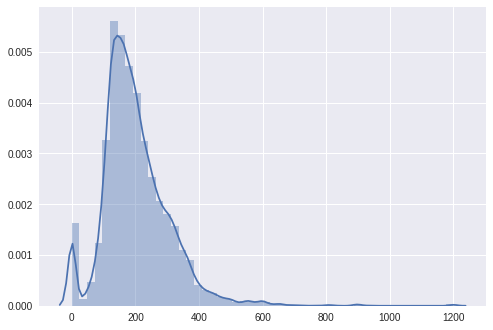

In [286]:
foodcost.describe(), sns.distplot(foodcost)

In [407]:
tagdf.head()

,tag:pet,tag:transport,tag:capital,tag:home,tag:sport,tag:culture,tag:safe,tag:food
0,0,2.308837e-09,False,True,2.371785e-09,2.985829e-10,4.055227e-10,6.525216e-10
1,0,4.929156e-10,False,True,4.867298e-10,1.577500e-10,2.695675e-10,1.674150e-13
2,0,2.016696e-09,False,True,1.510399e-09,3.114562e-10,4.757647e-10,5.635096e-10
3,0,3.944688e-09,True,False,2.889785e-09,3.421215e-10,4.645851e-10,6.550678e-10
4,0,0.000000e+00,True,False,3.119021e-10,1.185515e-10,2.360633e-10,3.504588e-11


In [383]:
tagdf.quantile()

tag:pet          0.000000e+00
tag:transport    2.195041e-08
tag:capital      0.000000e+00
tag:home         0.000000e+00
tag:sport        1.805521e-09
tag:culture      2.551371e-09
tag:safe         2.756701e-09
tag:food         2.506566e-09
Name: 0.5, dtype: float64

In [408]:
tagdf.apply(lambda x: (x - x.mean())/x.std() > 0).mean()

tag:pet          0.191778
tag:transport    0.475709
tag:capital      0.248602
tag:home         0.160979
tag:sport        0.531328
tag:culture      0.405678
tag:safe         0.463659
tag:food         0.512628
dtype: float64

In [288]:
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler()

In [979]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [997]:
#test2
from sklearn.preprocessing import robust_scale
test = robust_scale(tagdf)

In [998]:
test = pd.DataFrame(test)

In [980]:
test = pd.DataFrame(sc.fit_transform(tagdf.T).T)

In [999]:
test.columns=tagdf.columns
test.iloc[:,0:4] = test.iloc[:,0:4].apply(lambda x: (x - x.mean())/x.std() > 0.5)
test.iloc[:,4:8] = test.iloc[:,4:8].apply(lambda x: (x - x.mean())/x.std() > 0.5)

In [703]:
test.mean()

tag:pet          0.191778
tag:transport    0.425439
tag:capital      0.248602
tag:home         0.160979
tag:sport        0.094853
tag:culture      0.262387
tag:safe         0.253567
tag:food         0.183825
dtype: float64

In [694]:
test[test['tag:pet']].mean()

tag:pet          1.000000
tag:transport    0.377984
tag:capital      0.120131
tag:home         0.099020
tag:sport        0.384519
tag:culture      0.343302
tag:safe         0.396331
tag:food         0.400854
dtype: float64

In [982]:
test.T.sum().describe()

count    20748.000000
mean         1.821429
std          1.033711
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          5.000000
dtype: float64

In [686]:
pd.DataFrame(test.T.sum()<1).sum()

0    0
dtype: int64

In [687]:
test2.shape

(20748, 8)

In [609]:
test2 = test.copy()

In [958]:
test = test | test2

In [649]:
test.shape

(20748, 8)

In [635]:
rentdf['twd97'] = rentdata

In [636]:
rentdf['food:avgcost'] = foodcost

In [659]:
rentdf.columns

Index(['ID', 'cityID', 'pet', 'rent', 'space', 'lat', 'lng', 'label', 'floor',
       'unit', 'transport', 'twd97', 'food:avgcost'],
      dtype='object')

In [664]:
outputdf = rentdf.loc[:,['ID','twd97','food:avgcost','unit']]

In [665]:
#rentdf.join(test).to_csv('./data/tag.csv', index=False)
outputdf.join(test).to_csv('./data/tag_011.csv', index=False)

In [638]:
checkdf = rentdf[test['tag:sport']]

In [639]:
checkdf.shape

(8676, 13)

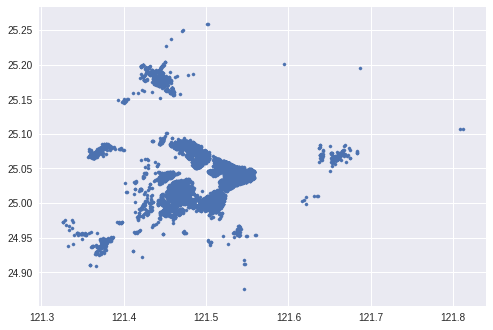

In [640]:
plt.scatter(checkdf['lng'],checkdf['lat'],s=10)

In [656]:
pd.read_csv('./data/tag_003.csv').tail()

,ID,cityID,pet,rent,space,lat,lng,label,floor,unit,...,twd97,food:avgcost,tag:pet,tag:transport,tag:capital,tag:home,tag:sport,tag:culture,tag:safe,tag:food
20743,24795,242,N,3000,3.00,25.038749,121.430277,套,5,1000.000000,...,"(293418.800767212, 2770138.4963897606)",69.631579,False,False,True,False,False,False,False,False
20744,24796,111,N,12500,13.00,25.097802,121.547934,套,2,961.538462,...,"(305265.14640106965, 2776722.485463635)",231.250000,False,True,False,False,False,True,True,False
20745,24797,220,N,7000,6.00,25.005620,121.453737,套,3,1166.666667,...,"(295798.4368991848, 2766476.701540458)",103.756098,False,False,True,False,True,False,False,False
20746,24798,104,N,25000,15.18,25.077680,121.546766,套,12,1646.903821,...,"(305156.2965833262, 2774493.1891007996)",172.172414,False,True,False,False,False,False,True,False
20747,24799,234,N,8000,7.00,25.007722,121.522225,套,4,1142.857143,...,"(302710.56623409496, 2766734.4178359597)",159.615385,False,False,True,False,True,False,False,True


# tfidf

In [724]:
df = pd.read_csv('./data/project_table.csv')

In [745]:
content = df.description.to_string()

In [732]:
import jieba
import jieba.analyse as jba

In [767]:
jieba.set_dictionary('dict.txt.big')
jba.set_idf_path('idf.txt.big')

In [768]:
tags = jba.extract_tags(content, topK=30, withWeight=True)

Building prefix dict from /home/jovyan/analytic/dict.txt.big ...
Loading model from cache /tmp/jieba.ud737ce4f5753b054a9e9992214de992b.cache
Loading model cost 1.048 seconds.
Prefix dict has been built succesfully.


In [782]:
desc_tag = df['description'].map(lambda desc : jba.extract_tags(str(desc),topK=20))

In [776]:
desc_tag

0              [描述, 首鼎四房, 交通, 行任, 輕鬆, 散步, 單純, 社區, 文風, 優質]
1                [台北, 江南, 高檔, 裝潢, 頤和, 描述, 渡假, 首選, 中歐, 就是]
2                [機能, 捷運, 川普, 完整, 重劃, 描述, 數大, 空間, 全新, 交屋]
3                [套房, 獨立, 月租, 淡水, 兩間, 一間, 便利, 捷運, 傢俱, 描述]
4              [全新, 傢俱, 描述, 鳳吉二街, 套房, 整理, 床組, 桌椅, 電視, 冰箱]
5                [捷運, 傢俱, 描述, 英專, 套房, 實在, 夜市, 加電, 冷氣, 冰箱]
6            [輕軌站, 捷運, 描述, 普羅, 2.24, 小時, 生活, 機能, 房車, 新市鎮]
7                                [描述, 公園, 美裝, 公寓, 二樓, 房屋]
8                    [公園, 景觀, 精美, 描述, 三房, 正面, 屋況, 稀有, 房屋]
9                  [士林, 描述, 福港, 機能, 雅房, 夜市, 劍潭, 河濱公園, 房屋]
10                       [捷運, 電梯, 高樓, 三房, 描述, 分鐘, 走路, 房屋]
11            [捷運, 描述, 近台電, 四房面, 羅斯福, 路近, 台電, 大四, 辦公, 房屋]
12                               [高樓, 描述, 台大, 三房, 遠景, 房屋]
13               [捷運, 新莊, 描述, 美寓, 地點, 生活, 機能, 清幽, 稀有, 房屋]
14                           [公園, 捷運, 描述, 電梯, 兩房, 大湖, 房屋]
15               [描述, 庭院, 一樓, 新光, 三越, 天母, 機能, 學校, 美國, 房屋]
16                                   [描述, 景觀, 套房, 美麗, 房屋]
17            

In [781]:
jba.extract_tags("""
全新裝潢   環境單純 電子密碼鎖   門口有監視系統安全有保障

近新莊萬坪公園,走路只要 3分鐘     近新莊捷運站,走路8分鐘
""",topK=20)

['新莊',
 '分鐘',
 '走路',
 '捷運',
 '全新',
 '裝潢',
 '單純',
 '電子',
 '密碼鎖',
 '安全',
 '保障',
 '萬坪',
 '公園',
 '只要',
 '監視系統',
 '門口',
 '環境']

In [783]:
def tagging(keywords, test):
    for word in keywords:
        if word in test:
            return True
    return False

In [784]:
keywords = ['公園','健身房']

In [1000]:
sport_y = desc_tag.map(lambda word : tagging(keywords,word))
log_y = test['tag:sport']

In [1001]:
test_y = sport_y | log_y

In [1002]:
from sklearn.model_selection import train_test_split

X, y = sportdf.values, test_y

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

In [1003]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() 
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [1004]:
X_std = sc.transform(X)

In [1005]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1, random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1006]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [1007]:
total_y = lr.predict(X_std)

In [1008]:
print('Accuracy: %.2f' % accuracy_score(test_y, total_y))

confmat = confusion_matrix(y_true=test_y, y_pred=total_y)
print(confmat)


Accuracy: 0.83
[[9523 1849]
 [1586 7790]]


In [1009]:
y_pred = lr.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)


Accuracy: 0.83
[[2850  542]
 [ 508 2325]]


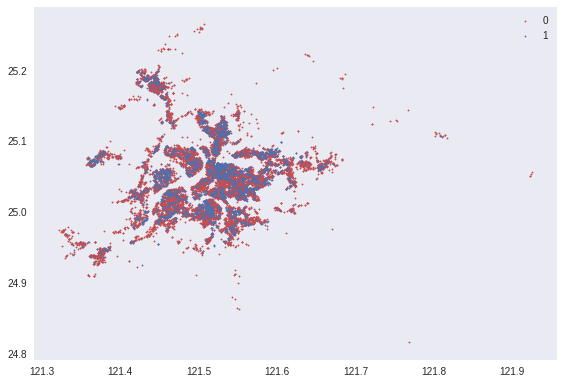

In [1010]:
colors = ['r', 'b', 'g', 'c', 'm', 'y']

for l, c in zip(range(2), colors):
    plt.scatter(rentdf[sport_y == l].lng , 
                rentdf[sport_y == l].lat, 
                c=c, label=l, s=2)


plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

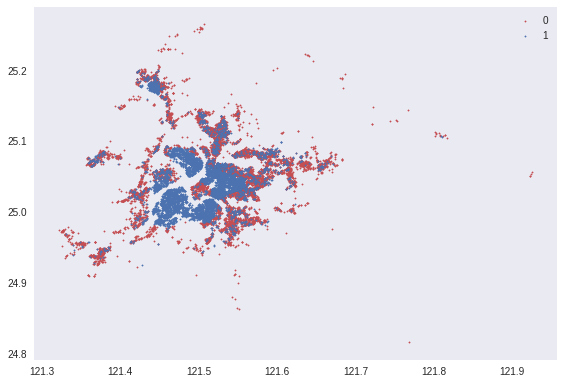

In [1011]:
#k-mean
colors = ['r', 'b', 'g', 'c', 'm', 'y']

for l, c in zip(range(2), colors):
    plt.scatter(rentdf[y == l].lng , 
                rentdf[y == l].lat, 
                c=c, label=l, s=2)


plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

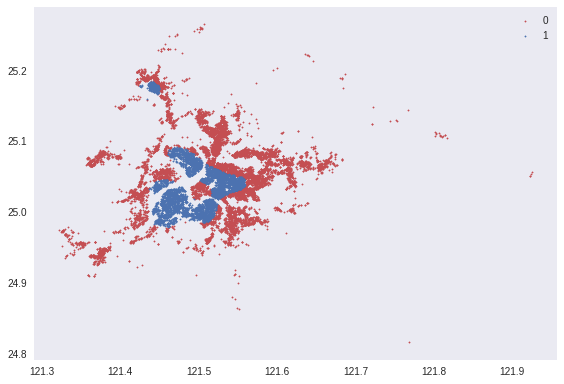

In [1012]:
#tag
colors = ['r', 'b', 'g', 'c', 'm', 'y']

for l, c in zip(range(2), colors):
    plt.scatter(rentdf[log_y == l].lng , 
                rentdf[log_y == l].lat, 
                c=c, label=l, s=2)


plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

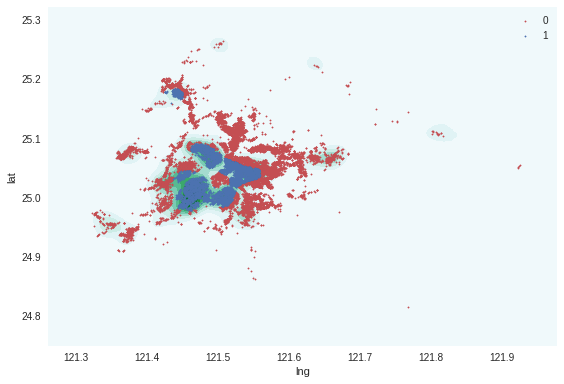

In [875]:
sns.kdeplot(envdf[envdf.typeID==403].lng,envdf[envdf.typeID==403].lat, shade=True,bw=0.01)
for l, c in zip(range(2), colors):
    plt.scatter(rentdf[test_y == l].lng , 
                rentdf[test_y == l].lat, 
                c=c, label=l, s=2)


plt.legend()
plt.grid()
plt.tight_layout()

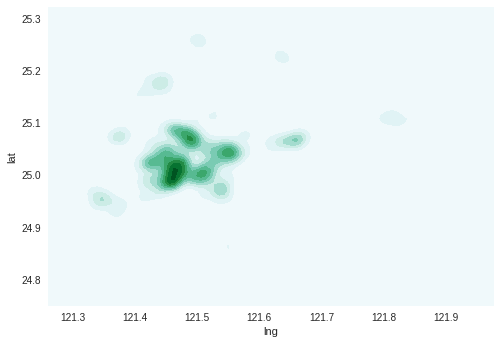

In [876]:
sns.kdeplot(envdf[envdf.typeID==403].lng,envdf[envdf.typeID==403].lat, shade=True,bw=0.01)

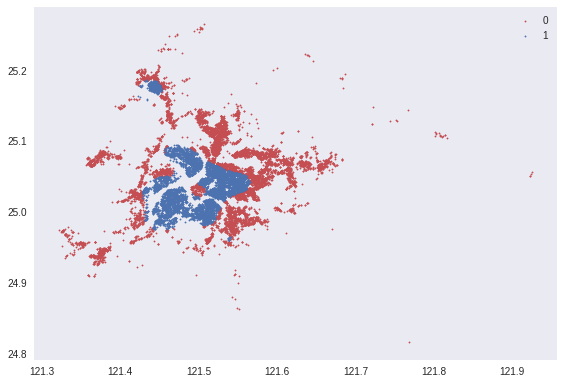

In [1013]:
for l, c in zip(range(2), colors):
    plt.scatter(rentdf[total_y == l].lng , 
                rentdf[total_y == l].lat, 
                c=c, label=l, s=2)


plt.legend()
plt.grid()
plt.tight_layout()

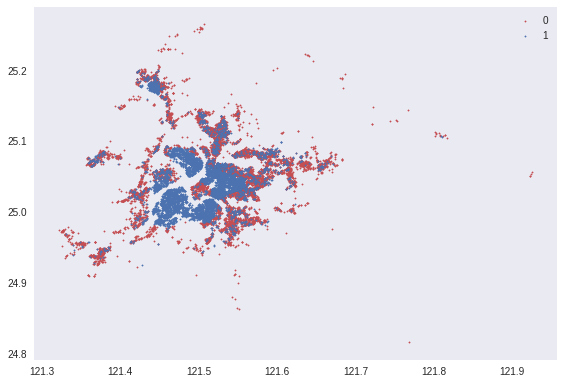

In [1023]:
for l, c in zip(range(2), colors):
    plt.scatter(rentdf[test_y == l].lng , 
                rentdf[test_y == l].lat, 
                c=c, label=l, s=2)


plt.legend()
plt.grid()
plt.tight_layout()

In [977]:
test_y.mean()

0.49985540775014459